# **Proyek Analisis Data: Bike Sharing**
- Nama: Rifzki Adiyaksa
- Email: rifzkiadiyaksa.mh@gmail.com
- Id Dicoding: rifzkiadiyaksa

# **Menentukan Pertanyaan Bisnis**

>1. Pada bulan apa terjadi kenaikan dan penurunan sewa sepeda?
2. Apa faktor yang mempengaruhi jumllah sewa sepeda?
3. Pukul berapa jumlah peminjaman sepeda dapat mencapai nilai tertingginya?
4. Secara signifikan, kondisi musim atau cuaca seperti apa yang dapat mempengaruhi jumlah peminjaman sepeda?
5. Kriteria pengguna seperti apa yang biasanya paling banyak melakukan penyewaan sepeda?

# **Menyiapkan semua library yang dibutuhkan**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wrangling**

## Gathering Data

In [35]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [36]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

### Menilai Data day_df

1. Tipe data

In [37]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


2. Parameter statistik

In [38]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


3. Missing value

In [39]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

4. Duplicate data

In [40]:
day_df.duplicated().sum()

0

Berdasarkan keempat hal yang disebutkan di atas, data day_df memiliki kesalahan tipe data pada kolom "dteday" yang seharusnya bertipe data datetime.

### Menilai Data hour_df

1. Tipe data

In [41]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


2. Parameter statistik

In [42]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


3. Missing value

In [43]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

4. Duplicate data

In [44]:
hour_df.duplicated().sum()

0

Berdasarkan keempat hal yang disebutkan di atas, data hour_df memiliki kesalahan tipe data pada kolom "dteday" yang seharusnya bertipe data datetime.

## Cleaning Data

### Data day_df

1. Mengubah nama kolom agar lebih mudah dibaca dan dipahami

In [45]:
day_df.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather",
    "cnt": "count"
}, inplace=True)

2. Mengubah tipe data kolom "dateday" ke datetime

In [46]:
day_df["dateday"] = pd.to_datetime(day_df["dateday"])

3. Mengganti value dalam beberapa kolom dari integer menjadi string

In [47]:
# kolom year
day_df["year"] = day_df["dateday"].dt.year

# kolom month
day_df["month"] = day_df["dateday"].dt.month_name()

# kolom weekday
day_df["weekday"] = day_df["dateday"].dt.day_name()

# kolom season
day_df["season"] = day_df["season"].map({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

# kolom weather
day_df["weather"] = day_df["weather"].map({
    1: "Clear/Partly Cloudy",
    2: "Misty",
    3: "Light Snow/Rain",
    4: "Heavy Rainstorm"
})

# kolom holiday
day_df["holiday"] = day_df["holiday"].map({
    0: "No",
    1: "Yes"
})

# kolom workingday
day_df["workingday"] = day_df["workingday"].map({
    0: "No",
    1: "Yes"
})

4. Mengubah tipe data kolom berikut menjadi kategori

In [48]:
columns = ["season", "year", "month", "holiday", "weekday", "workingday", "weather"]

for col in columns:
  day_df[col] = day_df[col].astype("category")

### Data hour_df

1. Mengubah nama kolom agar lebih mudah dibaca dan dipahami

In [49]:
hour_df.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "weathersit": "weather",
    "cnt": "count"
}, inplace=True)

2. Mengubah tipe data kolom "dateday" ke datetime

In [50]:
hour_df["dateday"] = pd.to_datetime(hour_df["dateday"])

3. Mengganti value dalam kolom yang bertipe data kategori dari integer menjadi string

In [51]:
# kolom year
hour_df["year"] = hour_df["dateday"].dt.year

# kolom month
hour_df["month"] = hour_df["dateday"].dt.month_name()

# kolom weekday
hour_df["weekday"] = hour_df["dateday"].dt.day_name()

# kolom season
hour_df["season"] = hour_df["season"].map({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

# kolom weather
hour_df["weather"] = hour_df["weather"].map({
    1: "Clear/Partly Cloudy",
    2: "Misty",
    3: "Light Snow/Rain",
    4: "Heavy Rainstorm"
})

# kolom holiday
hour_df["holiday"] = hour_df["holiday"].map({
    0: "No",
    1: "Yes"
})

# kolom workingday
hour_df["workingday"] = hour_df["workingday"].map({
    0: "No",
    1: "Yes"
})

4. Mengubah tipe data kolom berikut menjadi kategori

In [52]:
columns = ["season", "year", "month", "hour", "holiday", "weekday", "workingday", "weather"]

for col in columns:
  hour_df[col] = hour_df[col].astype("category")

# **Exploratory Data Analysis (EDA)**

## Explore Data day_df

1. Mengelompokkan jumlah sewa sepeda berdasarkan bulan

In [53]:
day_df.groupby(by="month").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
month,,,
April,60802,208292,269094
August,72039,279155,351194
December,21693,189343,211036
February,14963,136389,151352
January,12042,122891,134933
July,78157,266791,344948
June,73906,272436,346342
March,44444,184476,228920
May,75285,256401,331686


"Pada bulan Juni, jumlah sewa sepeda mencapai puncaknya dengan total 346.342 peminjaman, di mana sebagian besar dilakukan oleh pengguna yang telah terdaftar."

2. Mengelompokkan jumlah sewa sepeda berdasarkan kondisi musim dan cuaca

In [54]:
day_df.groupby(by=["season", "weather"]).agg({
    "count": ["min", "max", "sum"]
})

count              
                             min   max     sum
season weather                                
Fall   Clear/Partly Cloudy  3285  8714  799443
       Light Snow/Rain      1842  4459   11007
       Misty                1115  7582  250679
Spring Clear/Partly Cloudy   431  6312  312036
       Light Snow/Rain       441  2169    3739
       Misty                 605  7836  155573
Summer Clear/Partly Cloudy  2028  8294  626986
       Light Snow/Rain       795  1685    3507
       Misty                1471  8362  288096
Winter Clear/Partly Cloudy  1495  8555  519487
       Light Snow/Rain        22  4639   19616
       Misty                1096  7852  302510

"Jumlah sewa sepeda mencapai puncaknya dengan total peminjaman tertinggi pada musim gugur (Fall), terutama ketika cuaca relatif cerah (Clear/Partly Cloudy)."

3. Membandingkan jumlah sewa sepeda pada kategori hari libur dan kategori hari kerja

In [55]:
day_df.groupby(by="holiday")["count"].sum()

holiday
No     3214244
Yes      78435
Name: count, dtype: int64

In [56]:
day_df.groupby(by="workingday")["count"].sum()

workingday
No     1000269
Yes    2292410
Name: count, dtype: int64

Jumlah sewa sepeda paling banyak terjadi pada hari kerja, bukan hari libur.

4. Melihat hubungan korelasi antar kolom

In [57]:
day_df[["temp", "atemp", "hum", "windspeed", "count"]].corr()

,temp,atemp,hum,windspeed,count
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
count,0.627494,0.631066,-0.100659,-0.234545,1.000000


- Temp dan atemp memiliki nilai korelasi yang positif (bersesuaian) terhadap variabel count.
- Hum dan windspeed memiliki nilai korelasi yang negatif (berlawanan) terhadap variabel count.

## Explore Data hour_df

Mengelompokkan jumlah sewa sepeda berdasarkan jam

In [58]:
hour_df.groupby(by="hour")["count"].sum().sort_values(ascending=False)

hour
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: count, dtype: int64

"Jumlah sewa sepeda mencapai puncak pada pukul 17.00, sementara mencapai titik terendah pada pukul 04.00."

# **Visualization & Explanatory Analysis**

### Pertanyaan 1: Bagaimana frekuensi peminjaman sepeda antara tahun 2011 dan tahun 2012?

In [59]:
# mengurutkan bulan
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
day_df["month"] = pd.Categorical(day_df["month"], categories=month_order, ordered=True)

monthly_day_df = day_df.groupby(by=["month", "year"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count":"sum"
}).reset_index()

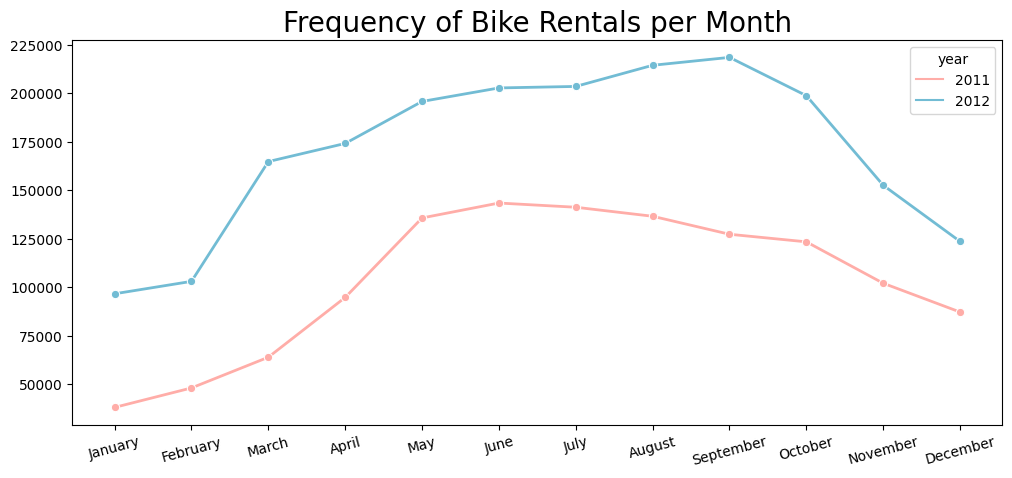

In [60]:
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=monthly_day_df,
    x="month",
    y="count",
    hue="year",
    marker="o",
    linewidth=2,
    palette=["#FFADA8", "#72BCD4"]
)
plt.title("Frequency of Bike Rentals per Month", loc="center", fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=15)

plt.show()

Berdasarkan grafik, dapat dilihat jumlah sewa sepeda terbanyak pada tahun 2011 di bulan Juni, sedangkan pada tahun 2012 di bulan September. Kemudian, terjadi penurunan jumlah sewa sepeda secara signifikan di tahun 2011 dan 2012 pada bulan yang sama, yaitu bulan Oktober, November, dan Desember.

### Pertanyaan 2: Faktor-faktor apa saja yang memengaruhi jumlah sewa sepeda?

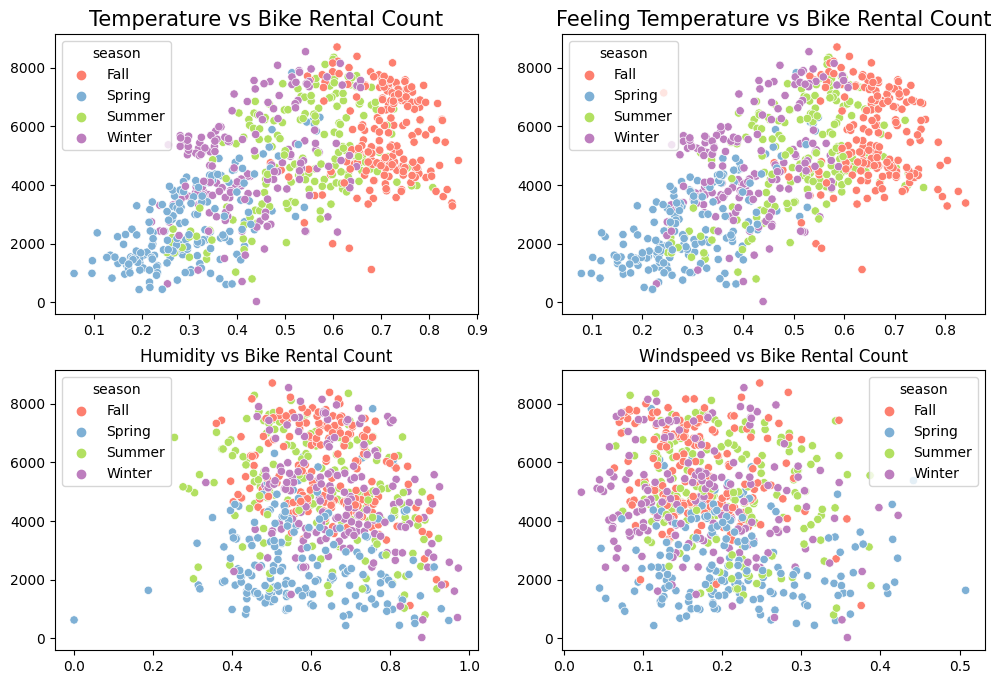

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
colors=["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe"]

sns.scatterplot(
    data=day_df,
    x="temp",
    y="count",
    hue="season",
    palette=colors,
    ax=ax[0][0]
)
ax[0][0].set_title("Temperature vs Bike Rental Count", loc="center", fontsize=15)
ax[0][0].set_xlabel(None)
ax[0][0].set_ylabel(None)

sns.scatterplot(
    data=day_df,
    x="atemp",
    y="count",
    hue="season",
    palette=colors,
    ax=ax[0][1]
)
ax[0][1].set_title("Feeling Temperature vs Bike Rental Count", loc="center", fontsize=15)
ax[0][1].set_xlabel(None)
ax[0][1].set_ylabel(None)

sns.scatterplot(
    data=day_df,
    x="hum",
    y="count",
    hue="season",
    palette=colors,
    ax=ax[1][0]
)
ax[1][0].set_title("Humidity vs Bike Rental Count", loc="center", fontsize=12)
ax[1][0].set_xlabel(None)
ax[1][0].set_ylabel(None)

sns.scatterplot(
    data=day_df,
    x="windspeed",
    y="count",
    hue="season",
    palette=colors,
    ax=ax[1][1]
)
ax[1][1].set_title("Windspeed vs Bike Rental Count", loc="center", fontsize=12)
ax[1][1].set_xlabel(None)
ax[1][1].set_ylabel(None)

plt.show()

"Berdasarkan scatterplot, terlihat adanya hubungan antara keempat variabel, yaitu temperature, feeling temperature, humidity, dan windspeed, terhadap jumlah sewa sepeda. Terlihat bahwa temperature dan feeling temperature memiliki korelasi positif yang sesuai, menunjukkan bahwa semakin tinggi suhu atau suhu yang dirasakan, semakin tinggi juga jumlah sewa sepeda. Sebaliknya, humidity dan windspeed menunjukkan korelasi negatif yang berlawanan, menandakan bahwa semakin tinggi kelembaban atau kecepatan angin, jumlah sewa sepeda cenderung lebih rendah. Meskipun demikian, hubungan dengan humidity dan windspeed terlihat lemah."

### Pertanyaan 3: Pada jam berapa peminjaman sepeda mencapai jumlah tertinggi?

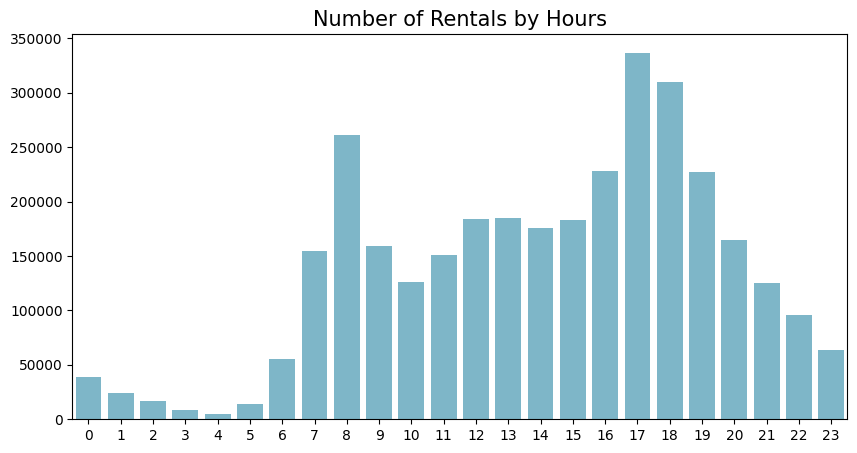

In [62]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4"]

sns.barplot(
    data=hour_df.groupby(by="hour")["count"].sum().reset_index(),
    x="hour",
    y="count",
    palette=colors
)
plt.title("Number of Rentals by Hours", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)

plt.show()

"Dari grafik, terlihat bahwa peminjaman sepeda mencapai puncaknya pada pukul 17.00, sementara jumlah peminjaman sepeda mencapai titik terendahnya pada pukul 04.00."

### Pertanyaan 4: Kondisi musim dan cuaca seperti apa yang paling memengaruhi jumlah peminjaman sepeda secara signifikan?

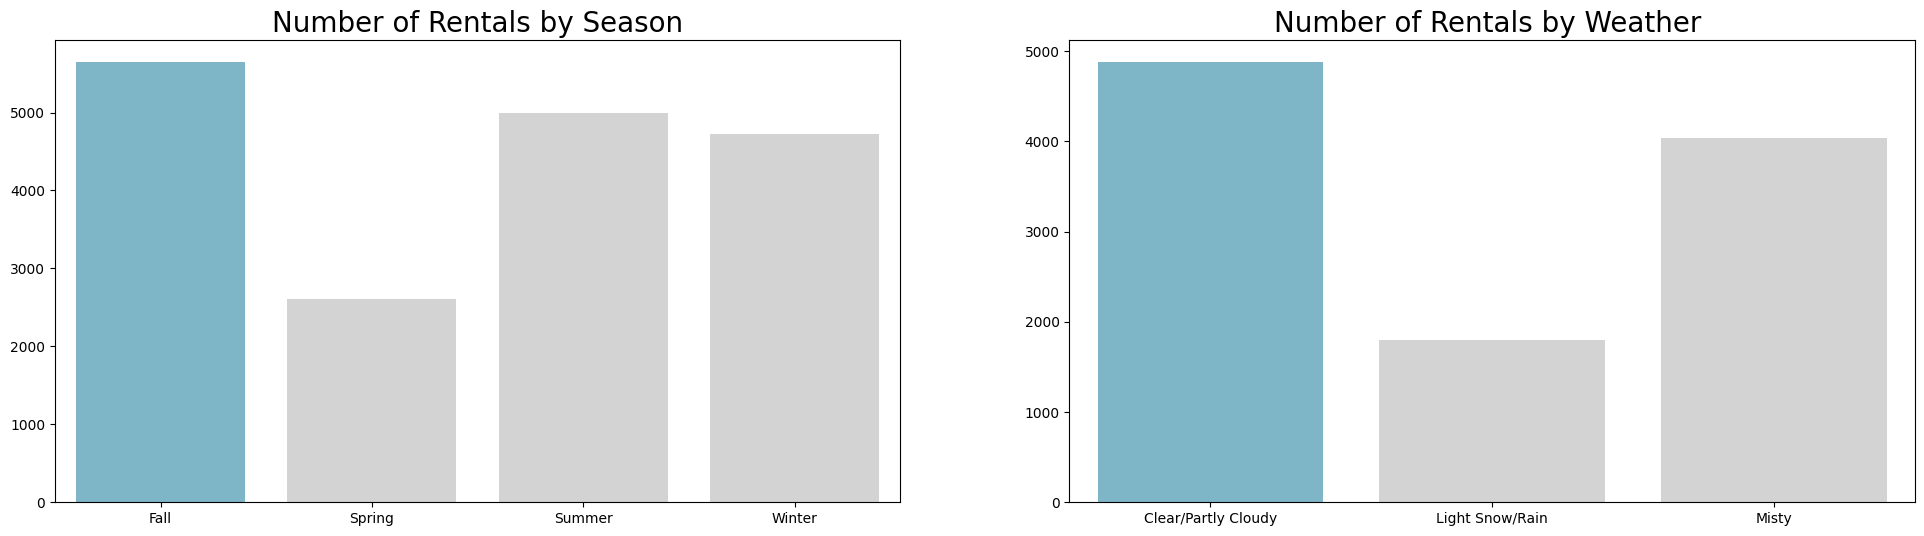

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    data=day_df,
    x="season",
    y="count",
    palette=colors,
    errorbar=None,
    ax=ax[0]
)
ax[0].set_title("Number of Rentals by Season", loc="center", fontsize=20)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)


sns.barplot(
    data=day_df,
    x="weather",
    y="count",
    palette=colors,
    errorbar=None,
    ax=ax[1]
)
ax[1].set_title("Number of Rentals by Weather ", loc="center", fontsize=20)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.show()

"Dapat diamati bahwa jumlah sewa sepeda bervariasi berdasarkan musim, dengan total peminjaman tertinggi terjadi di musim gugur dan paling rendah di musim semi.

Sementara itu, dalam konteks kondisi cuaca, terlihat bahwa total peminjaman sepeda mencapai puncaknya saat cuaca relatif cerah (Clear/Partly Cloudy) dan paling rendah saat terjadi cuaca salju atau hujan ringan (Light Snow/Rain)."

### Pertanyaan 5: Pengguna dengan kategori apa yang paling banyak dalam menyewa sepeda?

In [64]:
# mengurutkan hari
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
day_df["weekday"] = pd.Categorical(day_df["weekday"], categories=day_order, ordered=True)

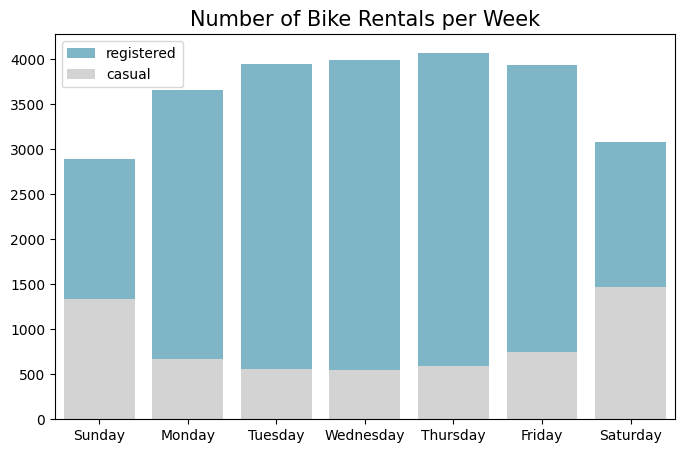

In [65]:
plt.figure(figsize=(8, 5))

sns.barplot(
    x=day_df["weekday"],
    y=day_df["registered"],
    label="registered",
    errorbar=None,
    color="#72BCD4"
)

sns.barplot(
    x=day_df["weekday"],
    y=day_df["casual"],
    label="casual",
    errorbar=None,
    color="#D3D3D3"
)

plt.title("Number of Bike Rentals per Week", loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.show()

Berdasarkan grafik, dapat dilihat bahwa jumlah peminjaman sepeda dari hari ke hari didominasi oleh pengguna yang telah terdaftar daripada pengguna casual.

# **Conclusion**

### 1. Pada bulan apa terjadi kenaikan dan penurunan sewa sepeda?


- Jumlah sewa sepeda terbanyak pada tahun 2011 di bulan Juni, sedangkan pada tahun 2012 di bulan September, serta terdapat penurunan jumlah peminjaman sepeda di tahun 2011 dan 2012 pada bulan Oktober, November, dan Desember.

### 2. Apa faktor yang mempengaruhi jumllah sewa sepeda?

Temperature, feeling temperature, humidity, dan windspeed dengan hubungan seperti berikut:

- Semakin besar nilai temperature dan feeling temperature, semakin banyak pula jumlah sewa sepeda. (bersesuaian)
- Semakin besar nilai humidity dan windspeed, semakin sedikit pula jumlah sewa sepeda. (berlawanan)

### 3. Pukul berapa jumlah peminjaman sepeda dapat mencapai nilai tertingginya?

Jumlah sewa sepeda dapat mencapai nilai tertinggi nya pada jam 17.00.

### 4. Secara signifikan, kondisi musim atau cuaca seperti apa yang dapat mempengaruhi jumlah peminjaman sepeda?

Jumlah sewa sepeda dengan total peminjaman yang paling banyak beradasarkan data yang telah di ekstrasi, terjadi di musim gugur (Fall) dan kondisi cuaca relatif cerah  (Clear/Partly Cloudy).

Sedangkan yang paling sedikit terjadi di musim semi (Spring) dan kondisi cuaca salju atau hujan ringan (Light Snow/Rain).

### 5. Kriteria pengguna seperti apa yang biasanya paling banyak melakukan penyewaan sepeda?

Sebagian besar penyewaan dilakukan oleh pengguna yang telah mendaftar atau terdaftar (Pelanggan tetap).

# **Export Clean Dataset**

In [66]:
day_df.to_csv("/content/cleaned_day.csv", index=False)